In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import joblib

# Set the start and end date for data retrieval
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

stocks = [
    "ABBV", "ACN", "AMD", "AMZN", "AVGO", "AXP", "BAC", "BK", "BLK", "BMY", "C", "CL", "COF",
    "COP", "CVS", "CVX", "DIS", "NKE", "DUK", "F", "FDX", "GD", "GILD", "GM", "GOOG", "GOOGL",
    "INTC", "JNJ", "KHC", "LLY", "LMT", "META", "MRK", "MS", "MSFT", "NFLX", "NVDA", "ORCL",
    "PG", "QCOM", "SCHW", "T", "TGT", "TMUS", "TSLA", "UNH", "USB", "VZ", "WFC", "XOM"
]

# Create an empty DataFrame to store the stock closing prices
df = pd.DataFrame()

# Iterate through each stock ticker and retrieve its closing prices
for stock in stocks:
    # Download historical stock data using yfinance API and extract the 'Close' prices
    stock_data = yf.download(stock, start=start_date, end=end_date)['Close']
    # Add the stock's closing prices as a column to the DataFrame with the stock ticker as the column name
    df[stock] = stock_data


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1

In [2]:
df.head()

,ABBV,ACN,AMD,AMZN,AVGO,AXP,BAC,BK,BLK,BMY,...,SCHW,T,TGT,TMUS,TSLA,UNH,USB,VZ,WFC,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,98.410004,153.839996,10.98,59.450500,267.010010,98.940002,29.900000,53.820000,508.970001,61.310001,...,51.439999,29.108761,67.629997,64.040001,21.368668,221.160004,54.029999,53.529999,61.090000,85.029999
2018-01-03,99.949997,154.550003,11.55,60.209999,269.929993,99.550003,29.799999,54.150002,514.340027,61.360001,...,51.520000,28.436556,67.169998,63.610001,21.150000,223.479996,54.560001,52.430000,61.560001,86.699997
2018-01-04,99.379997,156.380005,12.12,60.479500,270.019989,100.849998,30.190001,54.689999,521.130005,61.750000,...,51.810001,28.700907,65.849998,63.000000,20.974667,224.449997,54.980000,52.599998,62.330002,86.820000
2018-01-05,101.110001,157.669998,11.88,61.457001,271.619995,101.080002,30.330000,54.830002,525.570007,61.889999,...,52.009998,28.806646,66.550003,64.599998,21.105333,228.729996,55.320000,52.480000,62.750000,86.750000
2018-01-08,99.489998,158.929993,12.28,62.343498,272.269989,100.150002,30.120001,55.060001,529.489990,61.910000,...,52.240002,28.889729,67.180000,65.099998,22.427334,224.759995,55.400002,52.389999,62.040001,87.139999


In [3]:
# Print the number of missing values for each column in the DataFrame
print(df.isnull().sum())


ABBV     0
ACN      0
AMD      0
AMZN     0
AVGO     0
AXP      0
BAC      0
BK       0
BLK      0
BMY      0
C        0
CL       0
COF      0
COP      0
CVS      0
CVX      0
DIS      0
NKE      0
DUK      0
F        0
FDX      0
GD       0
GILD     0
GM       0
GOOG     0
GOOGL    0
INTC     0
JNJ      0
KHC      0
LLY      0
LMT      0
META     0
MRK      0
MS       0
MSFT     0
NFLX     0
NVDA     0
ORCL     0
PG       0
QCOM     0
SCHW     0
T        0
TGT      0
TMUS     0
TSLA     0
UNH      0
USB      0
VZ       0
WFC      0
XOM      0
dtype: int64


In [4]:
df.columns

Index(['ABBV', 'ACN', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BK', 'BLK', 'BMY',
       'C', 'CL', 'COF', 'COP', 'CVS', 'CVX', 'DIS', 'NKE', 'DUK', 'F', 'FDX',
       'GD', 'GILD', 'GM', 'GOOG', 'GOOGL', 'INTC', 'JNJ', 'KHC', 'LLY', 'LMT',
       'META', 'MRK', 'MS', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'PG', 'QCOM',
       'SCHW', 'T', 'TGT', 'TMUS', 'TSLA', 'UNH', 'USB', 'VZ', 'WFC', 'XOM'],
      dtype='object')

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler object with feature range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the DataFrame into a 1D array and apply MinMax scaling
# MinMaxScaler expects input shape (n_samples, n_features), so reshape the 1D array to (n_samples, 1)
df_reshaped = np.array(df).reshape(-1, 1)
df_scaled = scaler.fit_transform(df_reshaped)

In [6]:
print(df_scaled)

[[0.09757308]
 [0.15486625]
 [0.00720428]
 ...
 [0.03657957]
 [0.0385331 ]
 [0.10986274]]


In [7]:
df_scaled.shape

(62950, 1)

In [8]:
# Calculate the size of the training set based on the specified percentage
training_size = int(len(df_scaled) * 0.65)

# Calculate the size of the test set
test_size = len(df_scaled) - training_size

# Split the scaled data into training and test sets
# Training data includes rows from index 0 to (training_size - 1), and all columns
train_data = df_scaled[0:training_size, :]

# Test data includes rows from index training_size to the end, and only the first column
test_data = df_scaled[training_size:len(df_scaled), :1]


In [9]:
training_size,test_size

(40917, 22033)

In [10]:
train_data

array([[0.09757308],
       [0.15486625],
       [0.00720428],
       ...,
       [0.07341754],
       [0.10387812],
       [0.19069128]])

In [11]:
import numpy

def create_dataset(dataset, time_step=1):
    """
    Converts an array of values into a dataset matrix.

    Parameters:
    dataset (array-like): Input array of values.
    time_step (int): Time step to create sequences of input features and output labels. Default is 1.

    Returns:
    tuple: A tuple containing two arrays: dataX, the input features, and dataY, the corresponding output labels.
    """

    dataX, dataY = [], []

    # Iterate through the dataset to create sequences of input features and output labels
    for i in range(len(dataset) - time_step - 1):
        # Slice the dataset to create a sequence of input features with length equal to time_step
        a = dataset[i:(i + time_step), 0]
        # Append the sequence of input features to dataX
        dataX.append(a)
        # Append the corresponding output label to dataY
        dataY.append(dataset[i + time_step, 0])

    # Convert dataX and dataY to numpy arrays
    return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
# Define the time step for creating sequences
time_step = 100

# Create sequences of input features and output labels for training data
# X_train contains sequences of input features where each sequence has 'time_step' time steps
# y_train contains the corresponding output labels
X_train, y_train = create_dataset(train_data, time_step)

# Create sequences of input features and output labels for test data
# X_test contains sequences of input features where each sequence has 'time_step' time steps
# y_test contains the corresponding output labels
X_test, y_test = create_dataset(test_data, time_step)


In [14]:
print(X_train.shape), print(y_train.shape)

(40816, 100)
(40816,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(21932, 100)
(21932,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
# Reshape the input data for LSTM model compatibility
# The input shape for LSTM should be [samples, time steps, features]

# Reshape training data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_train.shape[0] returns the number of samples
# X_train.shape[1] returns the number of time steps
# '1' indicates the number of features per time step (in this case, there's only one feature)

# Reshape test data
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Similar reshaping as for training data

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Define the model architecture
model = Sequential()

# Add LSTM layers with dropout and batch normalization
# Input shape: (number of time steps, number of features)
# LSTM with 50 units, return sequences to pass output to the next layer
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

model.add(LSTM(50,return_sequences=True))  # Another  LSTM layer

model.add(LSTM(50))  # Final LSTM layer without returning sequences

# Add a Dense output layer to produce single output value
model.add(Dense(1))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Add early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [19]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Fit the model to the training data
# The model is trained for 100 epochs with a batch size of 512
# Validation data is provided to evaluate the model's performance on unseen data after each epoch
# The early stopping callback is used to prevent overfitting and restore the best weights
model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
80/80 [==============================] - 81s 953ms/step - loss: 0.0118 - val_loss: 0.0257
Epoch 2/50
80/80 [==============================] - 80s 999ms/step - loss: 0.0113 - val_loss: 0.0252
Epoch 3/50
80/80 [==============================] - 75s 937ms/step - loss: 0.0108 - val_loss: 0.0262
Epoch 4/50
80/80 [==============================] - 75s 944ms/step - loss: 0.0108 - val_loss: 0.0248
Epoch 5/50
80/80 [==============================] - 80s 1s/step - loss: 0.0106 - val_loss: 0.0265
Epoch 6/50
80/80 [==============================] - 75s 935ms/step - loss: 0.0108 - val_loss: 0.0231
Epoch 7/50
80/80 [==============================] - 75s 938ms/step - loss: 0.0104 - val_loss: 0.0237
Epoch 8/50
80/80 [==============================] - 75s 938ms/step - loss: 0.0084 - val_loss: 0.0161
Epoch 9/50
80/80 [==============================] - 80s 1s/step - loss: 0.0058 - val_loss: 0.0121
Epoch 10/50
80/80 [==============================] - 74s 930ms/step - loss: 0.0048 - val_loss: 0.

In [28]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss:", loss)


686/686 [==============================] - 31s 45ms/step - loss: 1.5901e-04
Test Loss: 0.00015900854486972094


In [29]:
# Make predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

686/686 [==============================] - 22s 33ms/step


In [30]:
print(train_predict)

[[0.09640444]
 [0.14564207]
 [0.00463577]
 ...
 [0.0478787 ]
 [0.06745683]
 [0.10213079]]


In [31]:
# Inverse transform the predicted values to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE for the training data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))

# Print the RMSE for the training data
print("RMSE for Training Data:", train_rmse)

RMSE for Training Data: 146.6040121074899


In [33]:
# Calculate RMSE for the test data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

# Print the RMSE for the test data
print("RMSE for Test Data:", test_rmse)

RMSE for Test Data: 215.1603783181625


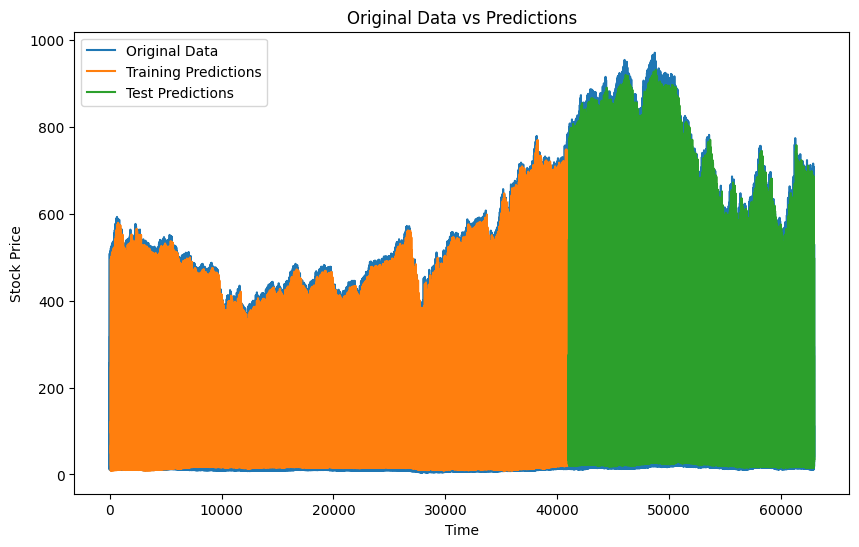

In [34]:
import matplotlib.pyplot as plt

# Initialize arrays for plotting
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict) + time_step, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (time_step * 2) + 1:len(df_scaled) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df_scaled), label='Original Data')  # Original data
plt.plot(trainPredictPlot, label='Training Predictions')  # Training predictions
plt.plot(testPredictPlot, label='Test Predictions')  # Test predictions
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Original Data vs Predictions')
plt.legend()
plt.show()
